In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Simple Linear Regression

# 1. Dataset

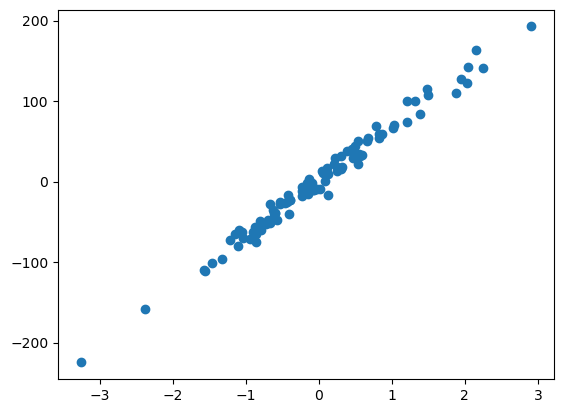

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x, y)

In [3]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
y = y.reshape(y.shape[0], 1) # car avec la fonction make_regression, les dimensions de y sont incomplètes
y.shape

(100, 1)

In [5]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.94396431,  1.        ],
       [-0.86464051,  1.        ],
       [-0.53673626,  1.        ],
       [ 0.06020087,  1.        ],
       [ 0.66069903,  1.        ],
       [-0.39301742,  1.        ],
       [-0.7896133 ,  1.        ],
       [ 0.21506049,  1.        ],
       [-0.60800997,  1.        ],
       [-0.61519717,  1.        ],
       [-0.0663514 ,  1.        ],
       [-0.7855417 ,  1.        ],
       [ 0.31331985,  1.        ],
       [ 0.12946717,  1.        ],
       [-0.13597139,  1.        ],
       [-0.46186069,  1.        ],
       [ 0.54217591,  1.        ],
       [-0.59432344,  1.        ],
       [ 0.49714031,  1.        ],
       [ 1.01341446,  1.        ],
       [ 0.58591112,  1.        ],
       [ 1.87374142,  1.        ],
       [-0.13056596,  1.        ],
       [ 0.11052709,  1.        ],
       [-0.16636472,  1.        ],
       [-1.09191861,  1.        ],
       [ 0.12862267,  1.        ],
       [-0.56955514,  1.        ],
       [-0.62261516,

In [6]:
# générer des nombres aléatoires dans une matrice
theta = np.random.randn(2,1)
theta

array([[ 0.28928058],
       [-0.40080915]])

# 2. Modèle

In [7]:
def model(X, theta):
    return(X.dot(theta))

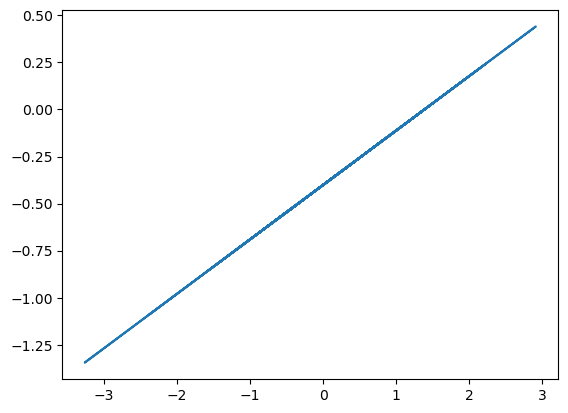

In [8]:
plt.plot(x, model(X, theta))

# 3. Fonction cout

In [9]:
def cost_function(X, y, theta):
    m = len(y) # ou m = x.shape[0]
    return (1 / (2 * m) * np.sum((model(X, theta) - y)**2))

In [10]:
cost_function(X, y, theta)

2303.268661909364

# 4. Gradient et Descente de Gradient

In [11]:
def gradient(X, y, theta):
    m = len(y) # ou m = x.shape[0]
    return(1 / (m) * X.T.dot(model(X, theta) - y))

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return(theta, cost_history)

# 5. Entrainement du modèle

In [13]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [14]:
theta_final

array([[67.72590236],
       [ 1.0119759 ]])

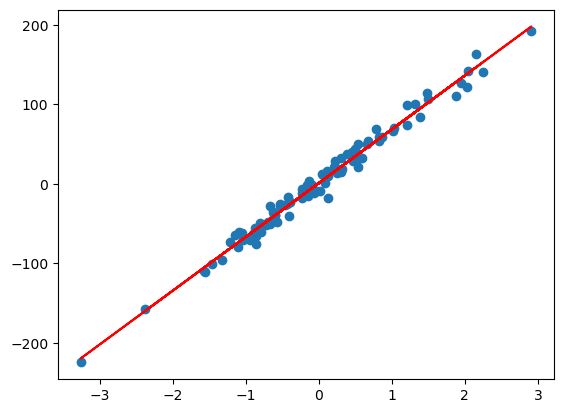

In [15]:
# vérifier si le vecteur theta nous donne de bons résultats
predictions = model(X, theta_final)

plt.scatter(x, y)
plt.plot(x, predictions, c = 'r')

# 6. Courbe d'apprentissage

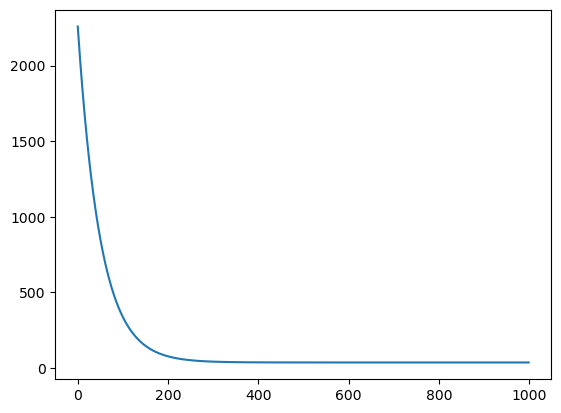

In [16]:
plt.plot(range(1000), cost_history)

# 7. Coefficient de détermination

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    
    return(1 - u/v)

In [18]:
coef_determination(y, predictions)

0.9843553067748555

# Polynomial Linear Regression

In [19]:
# 1- Dataset
i, j = make_regression(n_samples = 100, n_features = 1, noise = 10)
j = j + abs(j/2)

In [20]:
print(i.shape)
print(j.shape)

(100, 1)
(100,)


In [21]:
j = j.reshape(j.shape[0], 1)

In [22]:
print(j.shape)

(100, 1)


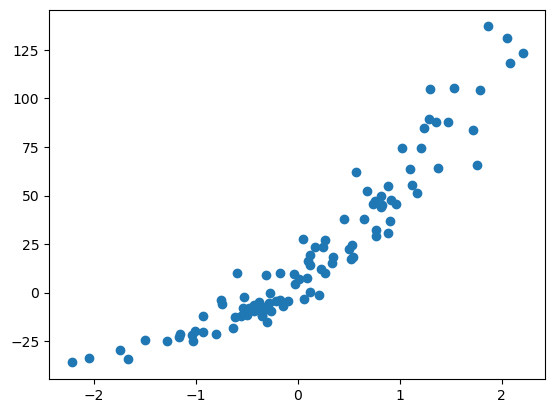

In [23]:
plt.scatter(i, j)

In [24]:
# matrice K
P = np.hstack((i, np.ones(i.shape)))
P

array([[ 0.76323722,  1.        ],
       [-0.17694279,  1.        ],
       [ 2.05498164,  1.        ],
       [ 0.5188493 ,  1.        ],
       [-0.34127659,  1.        ],
       [-1.27939417,  1.        ],
       [ 0.21163705,  1.        ],
       [ 2.07962253,  1.        ],
       [ 1.53223545,  1.        ],
       [ 0.52913714,  1.        ],
       [-0.27643881,  1.        ],
       [ 1.47108851,  1.        ],
       [-0.02447539,  1.        ],
       [ 0.16765815,  1.        ],
       [ 1.75678904,  1.        ],
       [ 0.81577846,  1.        ],
       [-0.63598087,  1.        ],
       [ 0.82533555,  1.        ],
       [ 0.96082087,  1.        ],
       [ 0.7613902 ,  1.        ],
       [-0.09555282,  1.        ],
       [ 0.67956864,  1.        ],
       [-1.03517429,  1.        ],
       [ 0.09995226,  1.        ],
       [-1.66510014,  1.        ],
       [-0.42829315,  1.        ],
       [-0.59271531,  1.        ],
       [-1.00280863,  1.        ],
       [-0.27249081,

In [25]:
K = np.hstack(((i**2), P))
K

array([[ 5.82531050e-01,  7.63237217e-01,  1.00000000e+00],
       [ 3.13087514e-02, -1.76942791e-01,  1.00000000e+00],
       [ 4.22294956e+00,  2.05498164e+00,  1.00000000e+00],
       [ 2.69204598e-01,  5.18849302e-01,  1.00000000e+00],
       [ 1.16469709e-01, -3.41276588e-01,  1.00000000e+00],
       [ 1.63684943e+00, -1.27939417e+00,  1.00000000e+00],
       [ 4.47902395e-02,  2.11637047e-01,  1.00000000e+00],
       [ 4.32482988e+00,  2.07962253e+00,  1.00000000e+00],
       [ 2.34774547e+00,  1.53223545e+00,  1.00000000e+00],
       [ 2.79986117e-01,  5.29137144e-01,  1.00000000e+00],
       [ 7.64184175e-02, -2.76438813e-01,  1.00000000e+00],
       [ 2.16410139e+00,  1.47108851e+00,  1.00000000e+00],
       [ 5.99044950e-04, -2.44753948e-02,  1.00000000e+00],
       [ 2.81092550e-02,  1.67658149e-01,  1.00000000e+00],
       [ 3.08630772e+00,  1.75678904e+00,  1.00000000e+00],
       [ 6.65494489e-01,  8.15778456e-01,  1.00000000e+00],
       [ 4.04471664e-01, -6.35980868e-01

In [26]:
# theta
thet = np.random.randn(3, 1)
thet

array([[-1.33994519],
       [-1.22728644],
       [-0.67748294]])

In [27]:
# 2- Modèle
def mod(K, thet):
    return(K.dot(thet))

In [28]:
predict = mod(K, thet)

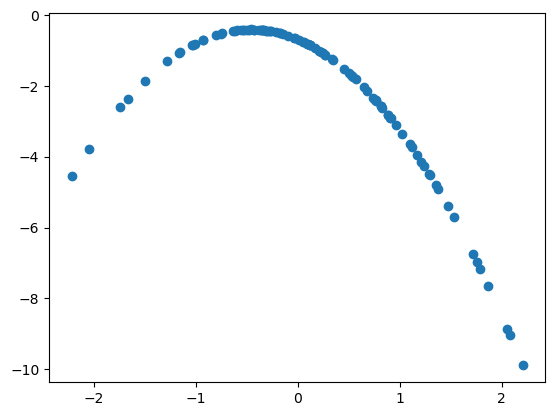

In [29]:
plt.scatter(i, predict)

In [30]:
# 3- Fonction cout
def cost_func(K, thet, j):
    m = len(j)
    return (1/(2*m) * np.sum((K.dot(thet) - j)**2))

In [31]:
# 4- Gradient 
def gr(K, thet, j):
    m = len(j)
    return ((1/m) * K.T.dot(K.dot(thet) - j))

In [32]:
# 5- Descente de gradient
def d_gr(K, thet, j, l_rate, n_iterations):
    cost_stock = np.empty(n_iterations)
    
    for l in range(n_iterations):
        thet = thet - (l_rate * gr(K, thet, j))
        cost_stock[l] = cost_func(K, thet, j)
        
    return (thet, cost_stock)

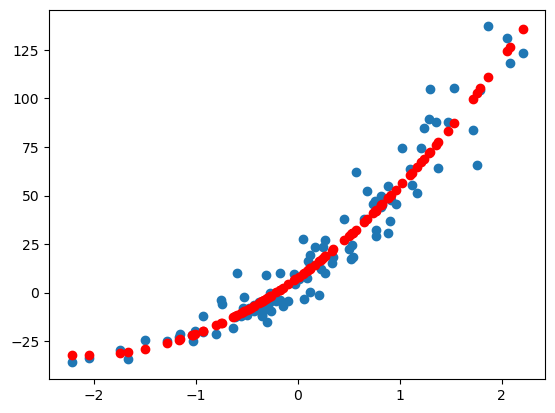

In [33]:
# 6- Entrainement du modèle
th, costa = d_gr(K, thet, j, l_rate = 0.01, n_iterations = 1000)
md = mod(K, th)

plt.scatter(i[:,0], j)
plt.scatter(i[:,0], md, c = 'r')

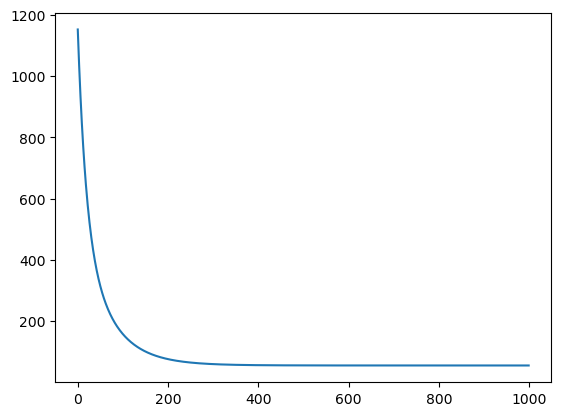

In [34]:
# 7- Courbe d'apprentissage
plt.plot(range(1000), costa)

In [35]:
# 8- Performance du modèle

def coef_det(j, pred):
    u = ((j - pred)**2).sum()
    v = ((j - j.mean())**2).sum()
    
    return(1 - u/v)

coef_det(j, md)

0.9327790039595305

# Multiple Linear Regression

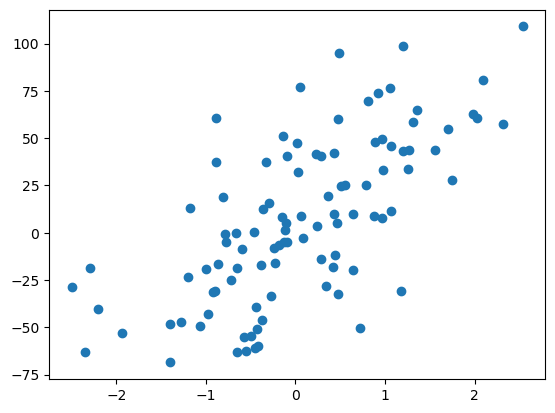

In [36]:
# 1- Dataset
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)
plt.scatter(x[:,0], y) # afficher les résultats 

In [37]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [38]:
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [39]:
# Création de la matrice avec biais
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-0.29332313  0.90185159  1.        ]
 [ 0.01612971  1.52307291  1.        ]
 [-1.00180429  0.55109893  1.        ]
 [ 0.2445435  -0.44643669  1.        ]
 [ 0.87389608 -0.50048821  1.        ]
 [-2.29495431  1.30296824  1.        ]
 [ 0.4707463  -1.42125281  1.        ]
 [ 1.25362514  0.26940165  1.        ]
 [-0.13300378  2.0012219   1.        ]
 [-0.88220208  1.70916738  1.        ]]


In [40]:
# Vecteur theta
theta = np.random.randn(3, 1)
theta

array([[-1.97647332],
       [ 1.56919596],
       [-1.49134323]])

In [41]:
# 2- Modèle
def model(X, theta):
    return(X.dot(theta))

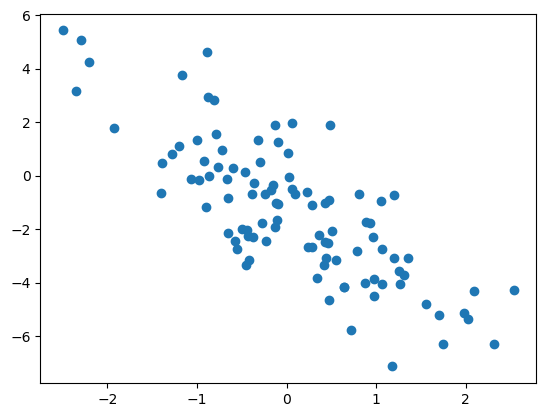

In [42]:
plt.scatter(x[:, 0], model(X, theta))

In [43]:
# 3- Fonction cout
def cost_func(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

In [44]:
# 4- Gradient
def grad(X, y, theta):
    m = len(y)
    return ((1/m) * X.T.dot(X.dot(theta) - y))

In [45]:
# 5- Descente de gradient
def d_gr(X, y, theta, l_rate, n_ite):
    cost_hist = np.empty(n_ite)
    
    for i in range(n_ite):
        theta = theta - (l_rate * grad(X, y, theta))
        cost_hist[i] = cost_func(X, y, theta)
        
    return theta, cost_hist

In [46]:
# 6- Entrainement du modèle
theta_final, cost_history = d_gr(X, y, theta, l_rate = 0.01, n_ite = 1000)
theta_final

array([[28.28138002],
       [29.81059356],
       [ 0.55683454]])

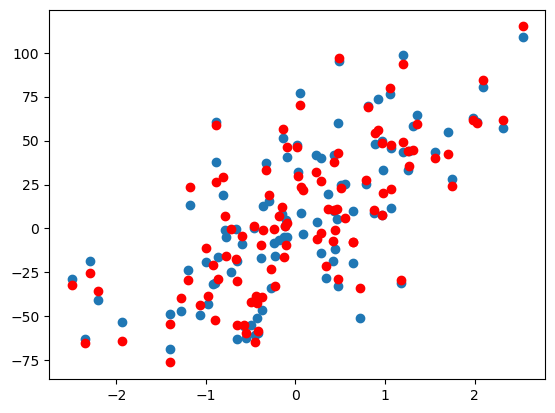

In [47]:
# 7- Création d'un vecteur de prédiction qui nous donne les prédictions du modèle
pred = model(X, theta_final)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], pred, c = 'r')

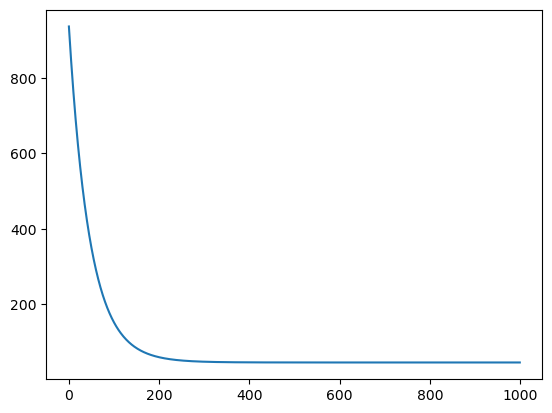

In [48]:
# 8- Courbe d'apprentissage
plt.plot(range(1000), cost_history)

In [49]:
# 9- Performance du modèle

def coef_det(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    
    return(1 - u/v)

coef_det(y, model(X, theta_final))

0.9492258144644087